## novel covid-19 **LSTM**

In [0]:
import pandas as pd
import numpy as np

df_patient = pd.read_csv('https://raw.githubusercontent.com/RenzoGuzman/Files-COVID-19-Peru/master/covid_19_data_peru.csv')

daily_count = df_patient.groupby('ObservationDate').Confirmed.sum()
daily_count = pd.DataFrame(daily_count)
daily_count

,Confirmed
ObservationDate,
03/06/2020,1
03/07/2020,1
03/08/2020,6
03/09/2020,7
03/10/2020,11
03/11/2020,11
03/12/2020,15
03/13/2020,28
03/14/2020,38


In [0]:
dataset = daily_count.iloc[1:]
dataset
dataset.columns = ['Confirmed']
print("len of the dataset::"+str(len(dataset)))
data = np.array(dataset).reshape(-1, 1)
train_data = dataset[:len(dataset)-13]#0..35
test_data = dataset[len(dataset)-13:]#35..40

train_data

len of the dataset::43


,Confirmed
ObservationDate,
03/07/2020,1
03/08/2020,6
03/09/2020,7
03/10/2020,11
03/11/2020,11
03/12/2020,15
03/13/2020,28
03/14/2020,38
03/15/2020,43


In [0]:
test_data

,Confirmed
ObservationDate,
04/06/2020,2561
04/07/2020,2954
04/08/2020,4342
04/09/2020,5256
04/10/2020,5897
04/11/2020,6848
04/12/2020,7519
04/13/2020,9784
04/14/2020,10303


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)
scaled_train_data

array([[0.        ],
       [0.00219298],
       [0.00263158],
       [0.00438596],
       [0.00438596],
       [0.00614035],
       [0.01184211],
       [0.01622807],
       [0.01842105],
       [0.0372807 ],
       [0.05087719],
       [0.06315789],
       [0.10219298],
       [0.10219298],
       [0.13903509],
       [0.15877193],
       [0.17280702],
       [0.18201754],
       [0.21008772],
       [0.25394737],
       [0.27807018],
       [0.29385965],
       [0.37324561],
       [0.41622807],
       [0.46666667],
       [0.57982456],
       [0.61973684],
       [0.69912281],
       [0.76535088],
       [1.        ]])

In [0]:
scaled_test_data

array([[1.12280702],
       [1.29517544],
       [1.90394737],
       [2.30482456],
       [2.58596491],
       [3.00307018],
       [3.29736842],
       [4.29078947],
       [4.51842105],
       [5.03245614],
       [5.47807018],
       [5.91578947],
       [6.32412281]])

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
n_input =3
n_features =1
                             
generator = TimeseriesGenerator(scaled_train_data,scaled_train_data, length=n_input, batch_size=1)

lstm_model = Sequential()
lstm_model.add(LSTM(19, activation='relu', input_shape = (n_input, n_features)))
lstm_model.add(Dense(10))
lstm_model.add(Dense(5))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

In [0]:
lstm_model.fit_generator(generator, epochs=100)

Epoch 1/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 2/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0303
Epoch 3/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0154
Epoch 4/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 5/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 6/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 7/100
27/27 [==============================] - 0s 2ms/step - loss: 9.7612e-04
Epoch 8/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 9/100
27/27 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 10/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 11/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 12/100
27/27 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/100
27/27 [=============

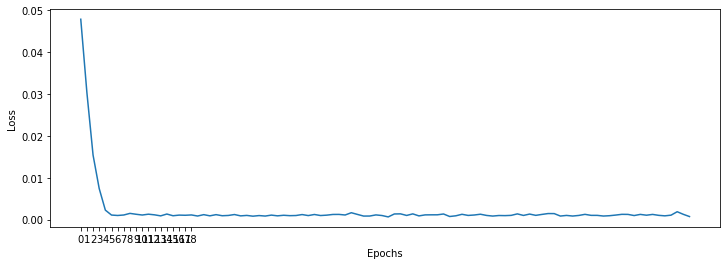

In [0]:
import matplotlib.pyplot as plt
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize = (12,4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,19,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

In [0]:
lstm_predictions_scaled = []

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)


# As you know we scaled our data that’s why we have to inverse it to see true predictions.
lstm_predictions_scaled

[array([1.0801075], dtype=float32),
 array([1.2306117], dtype=float32),
 array([1.4161663], dtype=float32),
 array([1.5869125], dtype=float32),
 array([1.8015339], dtype=float32),
 array([2.0492704], dtype=float32),
 array([2.331956], dtype=float32),
 array([2.675945], dtype=float32),
 array([3.0922973], dtype=float32),
 array([3.6053998], dtype=float32),
 array([4.253134], dtype=float32),
 array([5.0795856], dtype=float32),
 array([6.1471586], dtype=float32)]

In [0]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled) 
lstm_predictions

array([[ 2463.64498711],
       [ 2806.79463482],
       [ 3229.85917664],
       [ 3619.16052914],
       [ 4108.4973774 ],
       [ 4673.33649254],
       [ 5317.85947418],
       [ 6102.15469933],
       [ 7051.43787956],
       [ 8221.31165123],
       [ 9698.14500427],
       [11582.45505905],
       [14016.52165985]])

In [0]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Confirmed,LSTM_Predictions
ObservationDate,,
04/06/2020,2561,2463.644987
04/07/2020,2954,2806.794635
04/08/2020,4342,3229.859177
04/09/2020,5256,3619.160529
04/10/2020,5897,4108.497377
04/11/2020,6848,4673.336493
04/12/2020,7519,5317.859474
04/13/2020,9784,6102.154699
04/14/2020,10303,7051.437880


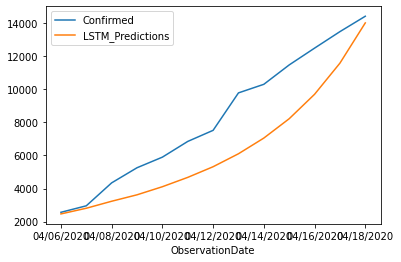

In [0]:
test_data.plot()

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('MAE of LSTM Model ',mean_absolute_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

print('MSE of LSTM Model ',mean_squared_error(test_data['Confirmed'], test_data['LSTM_Predictions']))

MAE of LSTM Model  2700.0289748728273
MSE of LSTM Model  12597709.701632597
